# Subplots

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


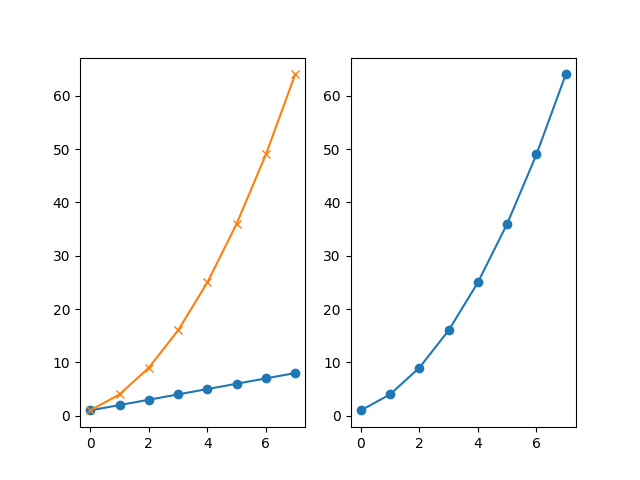

In [21]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [22]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [23]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


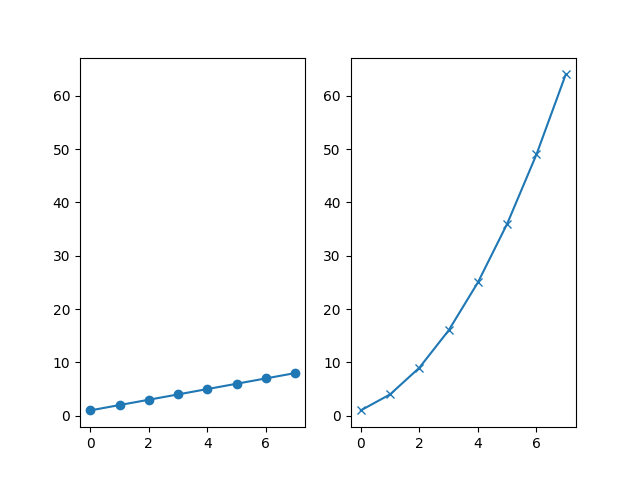

In [24]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


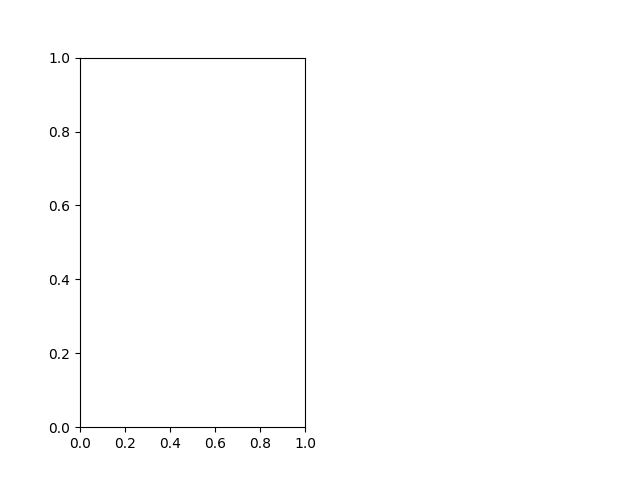

True

In [25]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


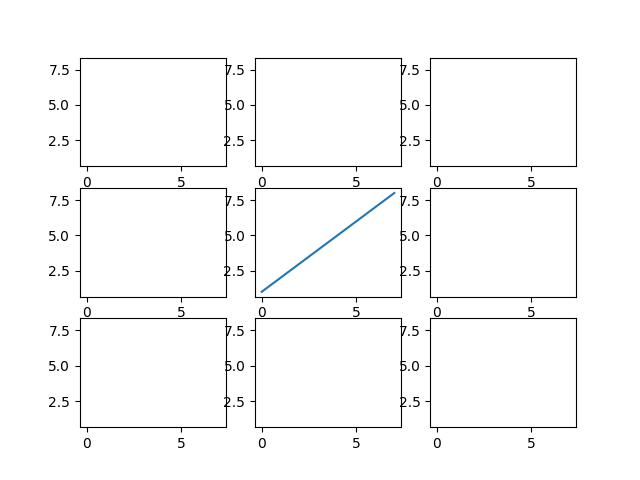

In [26]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
#the creation of subplpot through subplots function 
#returns all the created axis at once
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [27]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [28]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


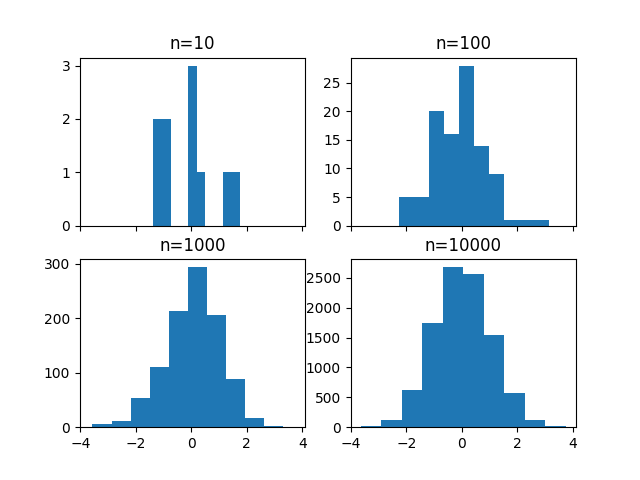

In [29]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

#if we look closely we can see that the bar of the 10000 plots are
#actually wider than those of the 10 or 100 plot
#Why? By default the histogram in Matplotlib uses ten bins that 
# that is ten different bars
# here we created a shared x-axis and as we sample more from the distribution
#we're more likely to get outlier values further from our mean
#thus ten bins for n = 10 is at best capturing unique values 
# while for n=10000, many values have to be combined into a single bin



<IPython.core.display.Javascript object>


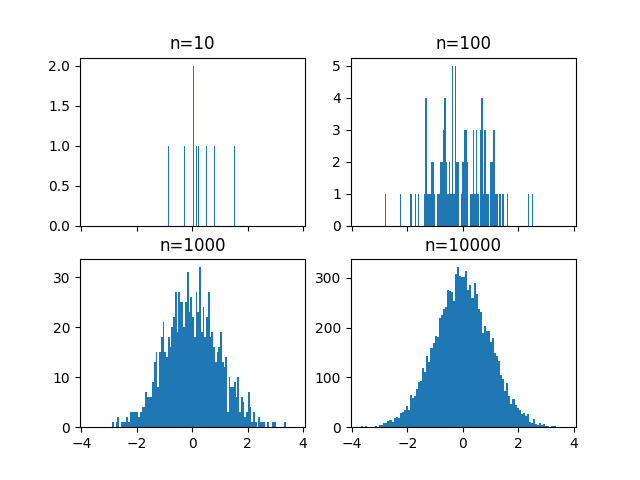

In [30]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))
#how many bins should you plot when using histogram?
#the answer isn't clear
#this and the previous plot are true. One the granularity is coarser
#the other one the granularity is finer

<IPython.core.display.Javascript object>


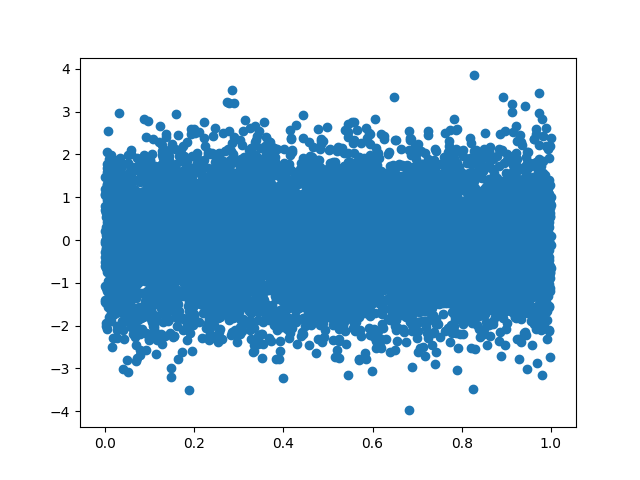

In [31]:
#the gridSpec allows ypup to map axes over multiple cells in a grid
#here we create a scatter plot where the y-values come from normal distributions
# and the x-values comes from a random distribution
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


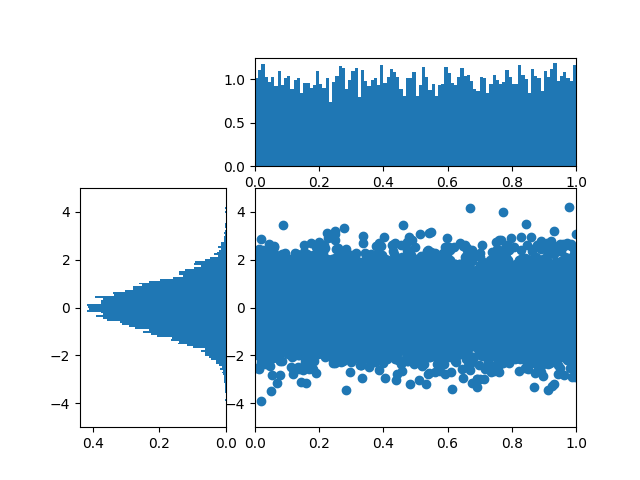

In [32]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [33]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [34]:
# clear the histograms and plot normed histograms
#normed=True) tells Matplotlib to scale the frquency data in the histogram
#between zero and one
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [35]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [36]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [37]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.004338,-0.001411,0.502063
std,1.418422,0.998007,0.288070
min,0.013494,-3.491030,0.000150
25%,0.958820,-0.667139,0.253039
50%,1.676528,0.001188,0.501882
75%,2.696311,0.669094,0.748780
max,12.510067,4.174410,0.999963


<IPython.core.display.Javascript object>


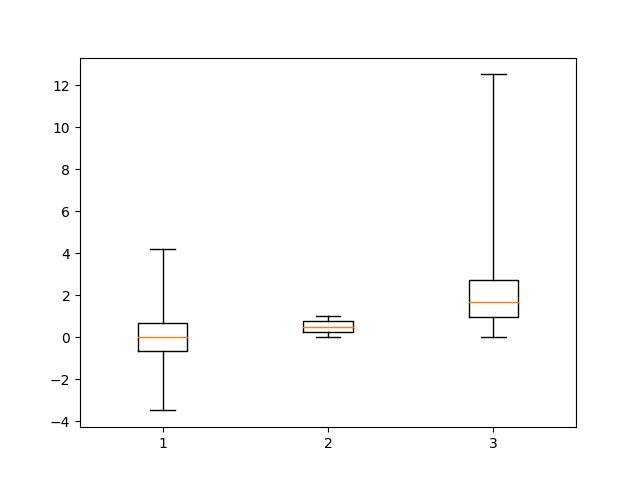

In [38]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
#whis parameter tells the box plot to set the whisker values all the way
#outr to the minimum and the maximum values
_ = plt.boxplot(df['normal'], whis='range')

In [40]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


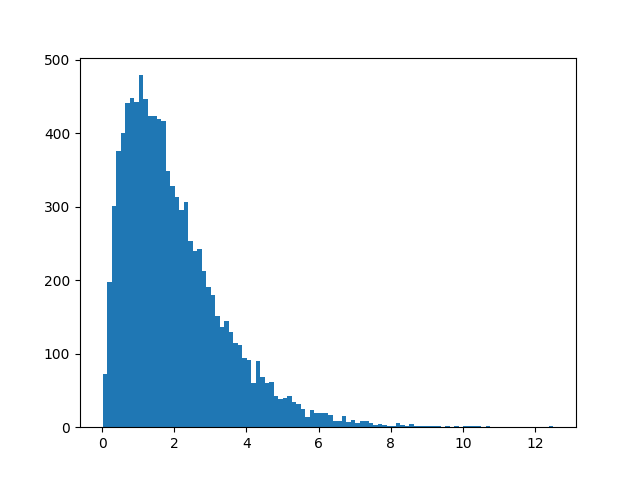

In [41]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


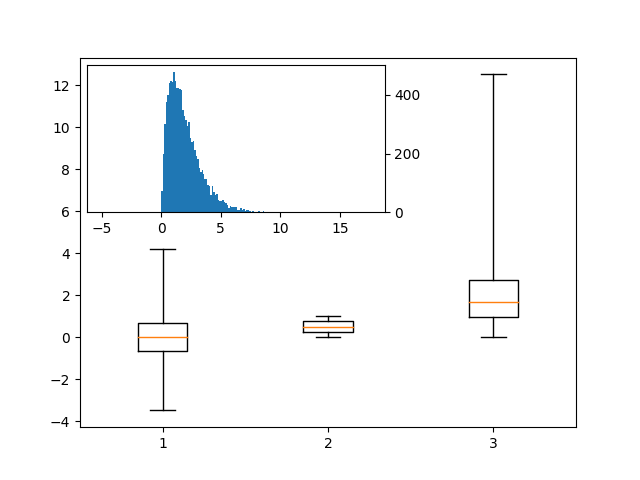

In [45]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [47]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


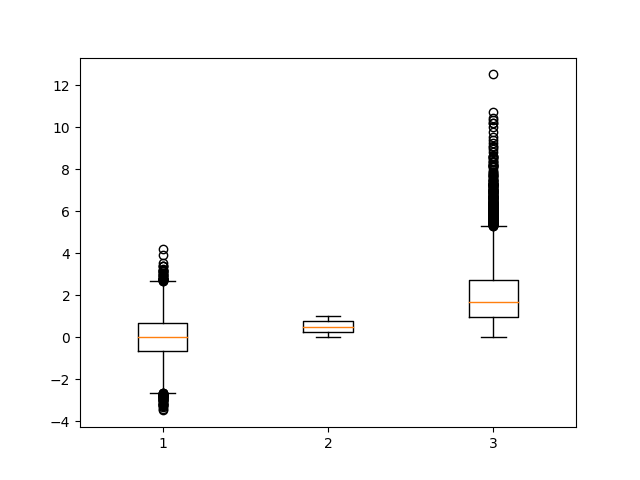

In [48]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


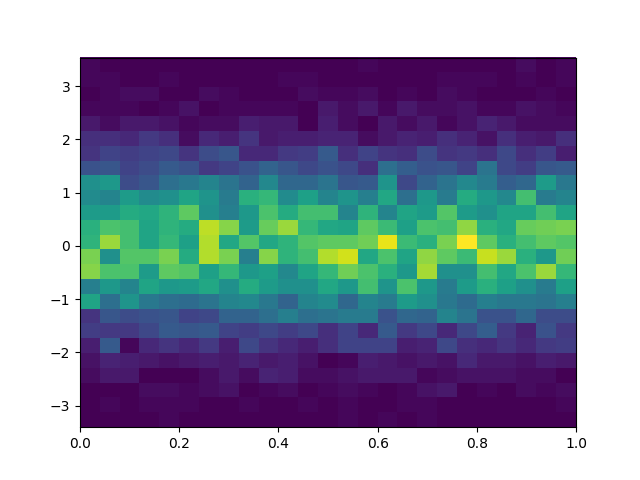

In [49]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25) 

<IPython.core.display.Javascript object>


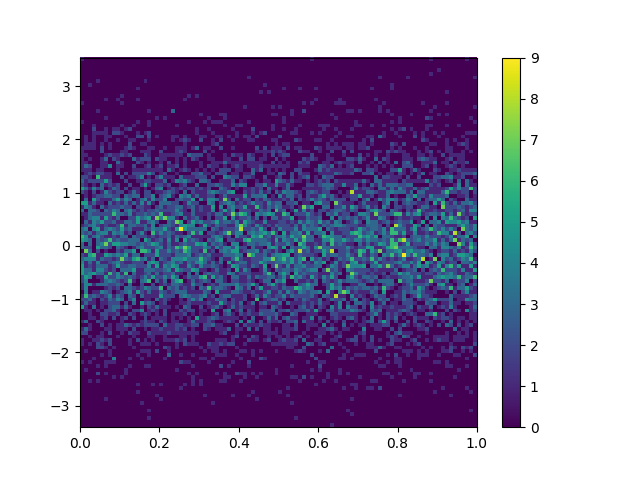

In [50]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [51]:
# add a colorbar legend
plt.colorbar()

# Animations

In [52]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [53]:
# create the function that will do the plotting, where curr is the current frame
#the matplot lib funcAnimation object is goig to call this function 
#every miliseconds and ppass in the frame number we are on starting
#with frame zero
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


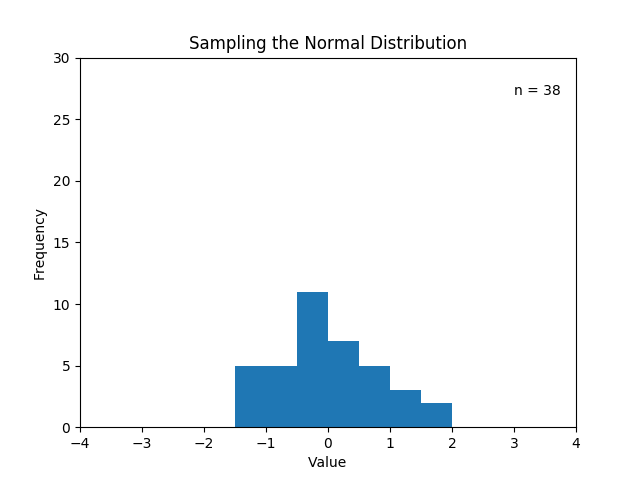

In [54]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

In [3]:
n = 10000
normal_sample = np.random.normal(loc=4, scale=1.0, size=n)
gamma_sample = np.random.gamma(2, scale=1.0, size=n)+1
exponential_sample = np.random.exponential(scale=1.0, size=n)+1
uniform_sample = np.random.uniform(low=1.0, high=9, size=n)
samples = [normal_sample,gamma_sample,exponential_sample,uniform_sample]
names = ['Normal','Gamma','Exponential','Uniform']


In [4]:
import matplotlib.animation as animation

# curr = n
def update(curr):
#     if curr == n: 
#         a.event_source.stop()
    
#     plt.axis([-10,10,0,30])
    plt.annotate('n = {}'.format(curr), [-9,27])
    for i in range(0,len(axes)):
        axes[i].cla()
        bins = np.arange(-10, 10, 0.5)
        axes[i].set_xlim(0,10)
        axes[i].set_ylim(0,1000)
        axes[i].hist(samples[i][:curr], bins=100, normed=True)
        axes[i].set_title('n={}'.format(n))
        axes[i].set_title(f'{names[i]} Distribution')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlabel('Value')


# a = animation.FuncAnimation(fig, update, interval=3)

<IPython.core.display.Javascript object>


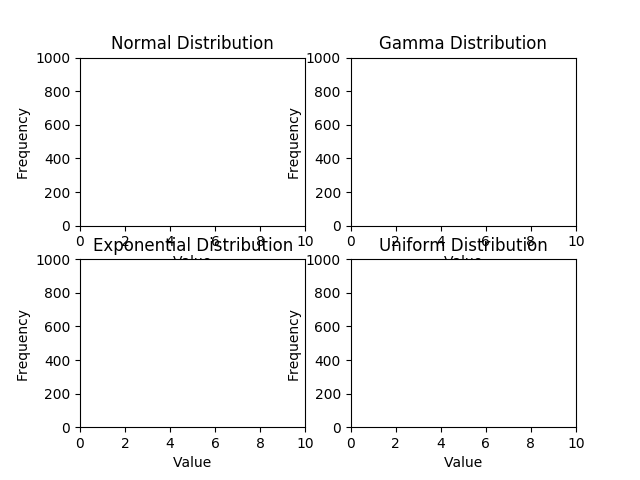

In [5]:
import time
fig, ((ax1, ax2),(x3,x4)) = plt.subplots(2, 2, sharex=True)
axes = [ax1,ax2,x3,x4]
update(n)
# a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


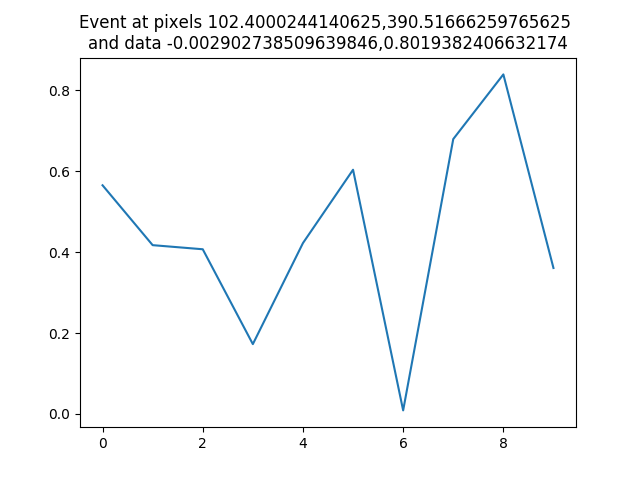

7

In [3]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)
#event is a piece of data which is associated with a function call
#when the event happens the software enviroment will call the function with the relevant data
def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
# we need to connect to an event listener and this process is usually called writing it up
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [34]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.851801,Chile,0.329212
1,0.299591,UK,0.685340
2,0.103356,Germany,0.471259
3,0.958511,China,0.556501
4,0.407584,Canada,0.674879
5,0.448022,India,0.378344
6,0.381263,Iraq,0.787690
7,0.928845,Brazil,0.466034
8,0.739643,USA,0.210039
9,0.656390,Mexico,0.422290


<IPython.core.display.Javascript object>


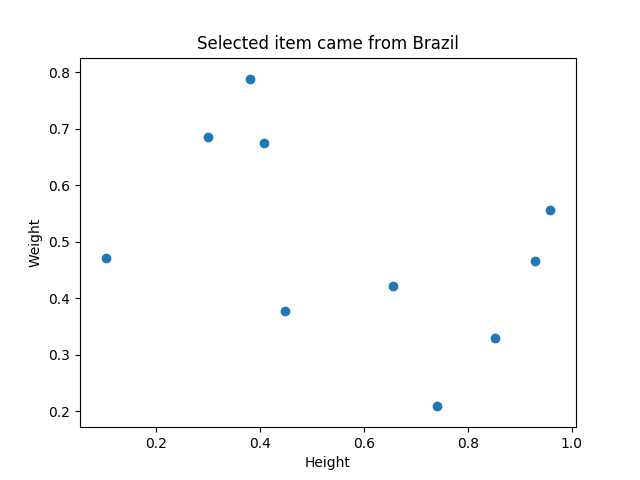

In [35]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [36]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7